<a href="https://colab.research.google.com/github/ShubhamGet/AndroidConcept2/blob/master/ANN_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Which GPU using

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11898311789965139899
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1191304376492955799
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

Ram Information

In [6]:
!cat /proc/meminfo

MemTotal:       13290480 kB
MemFree:         7869344 kB
MemAvailable:   11778880 kB
Buffers:          346148 kB
Cached:          3760408 kB
SwapCached:            0 kB
Active:           687668 kB
Inactive:        4312624 kB
Active(anon):       1276 kB
Inactive(anon):   904760 kB
Active(file):     686392 kB
Inactive(file):  3407864 kB
Unevictable:           4 kB
Mlocked:               4 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               432 kB
Writeback:             0 kB
AnonPages:        892780 kB
Mapped:           726208 kB
Shmem:             12296 kB
KReclaimable:     112436 kB
Slab:             159700 kB
SReclaimable:     112436 kB
SUnreclaim:        47264 kB
KernelStack:        4656 kB
PageTables:        15772 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645240 kB
Committed_AS:    2593372 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       79028 kB
VmallocChunk:    

Install -q keras

In [57]:
!pip install -q keras

In [58]:
import pandas as pd

# Part 1 Data preporcessing
# Importing the library

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [60]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [61]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [62]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)


In [63]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [64]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [67]:
# Initialising the ANN
classifier = Sequential()

In [68]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [69]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [70]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [71]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [72]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 5ms/step - loss: 0.6436 - accuracy: 0.6753 - val_loss: 0.5720 - val_accuracy: 0.7611
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5465 - accuracy: 0.7876 - val_loss: 0.5176 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5023 - accuracy: 0.7962 - val_loss: 0.4863 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4740 - accuracy: 0.7962 - val_loss: 0.4665 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4569 - accuracy: 0.7985 - val_loss: 0.4559 - val_accuracy: 0.7944
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4471 - accuracy: 0.8015 - val_loss: 0.4496 - val_accuracy: 0.7974
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4405 - accuracy: 0.8048 - val_loss: 0.4450 - val_accuracy: 0.8031

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


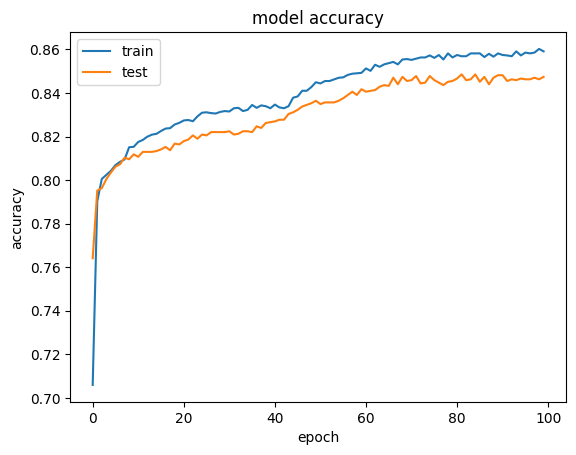

In [52]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

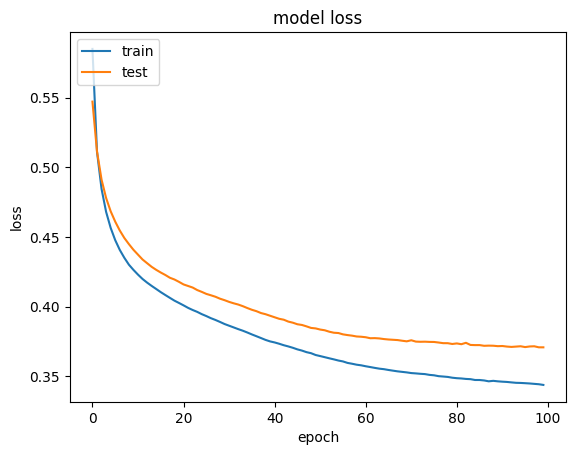

In [53]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [56]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)